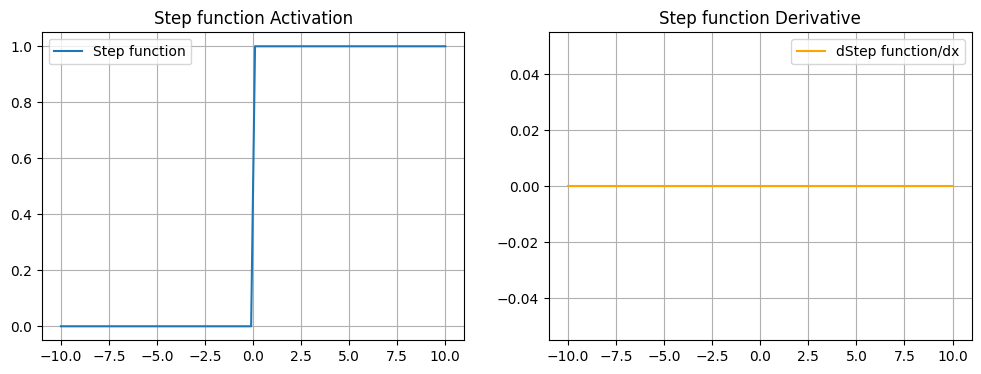

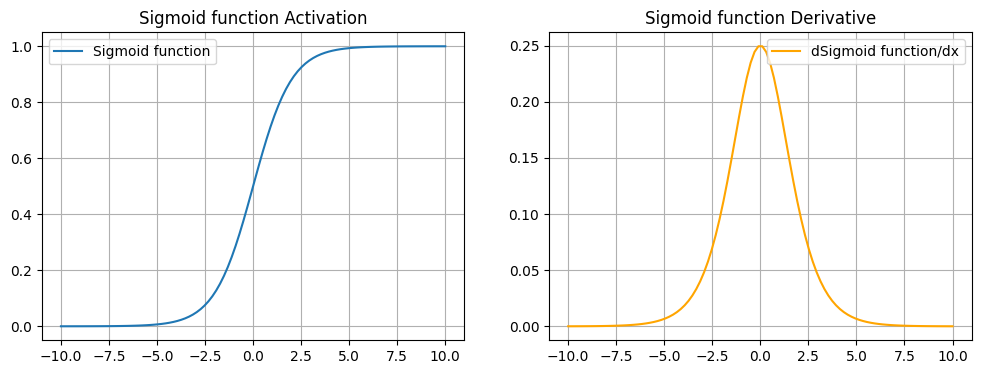

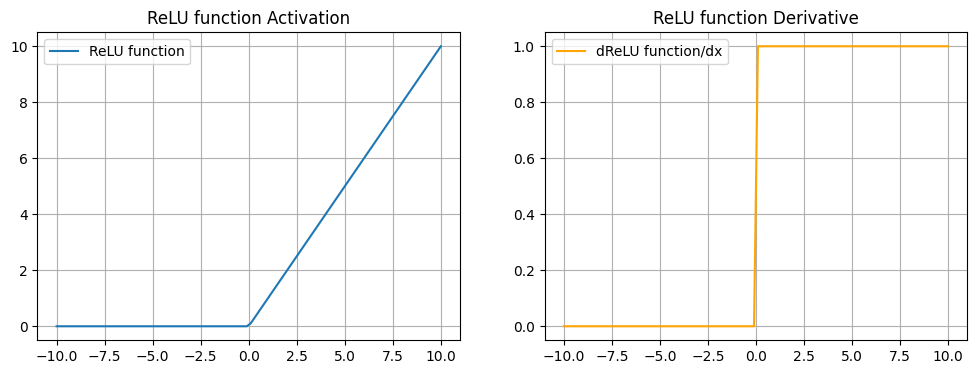

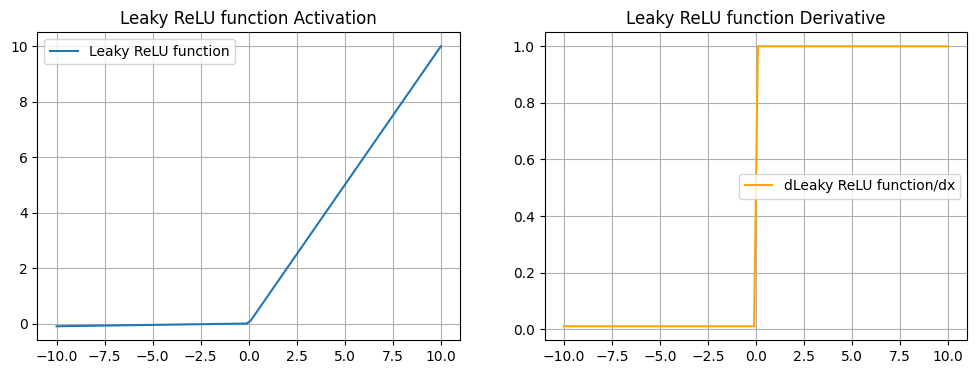

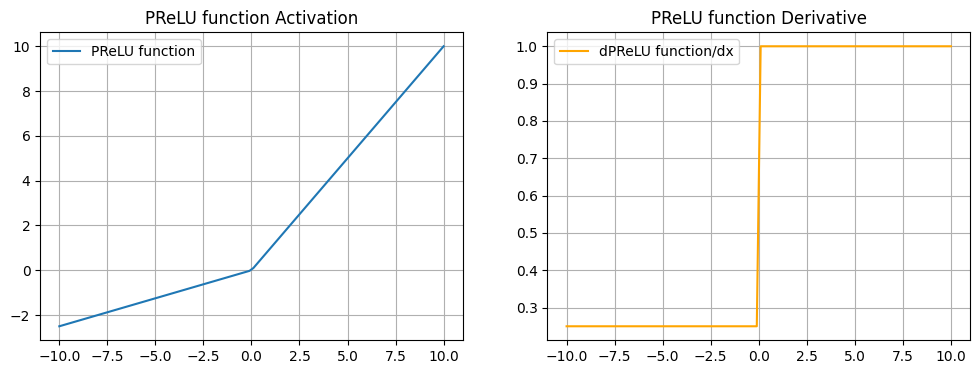

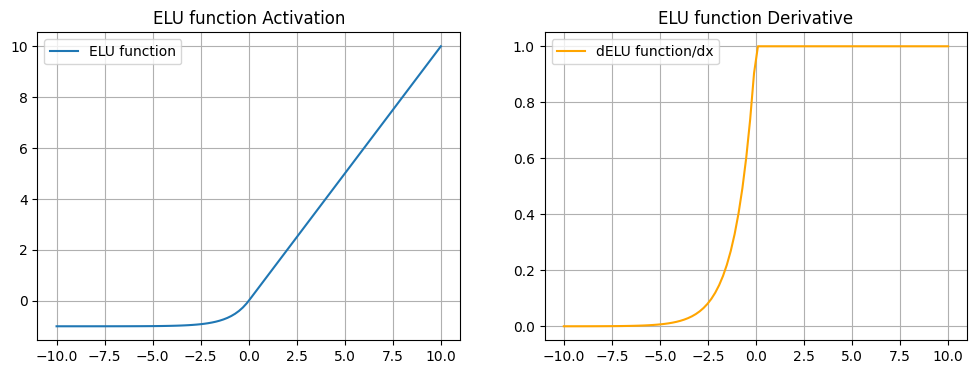

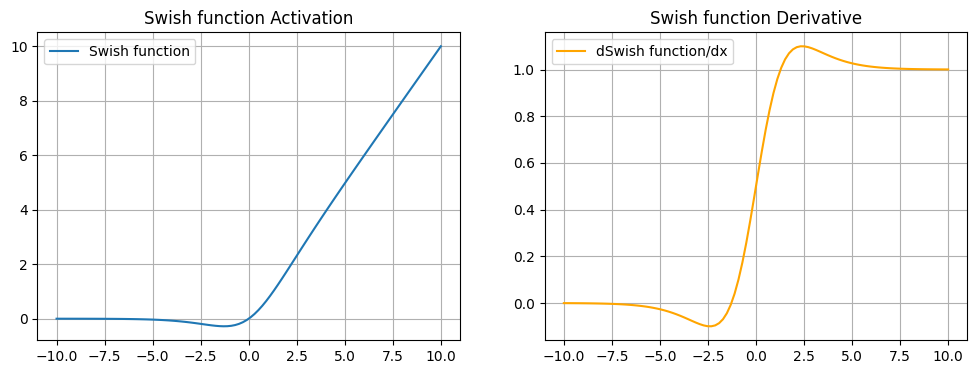

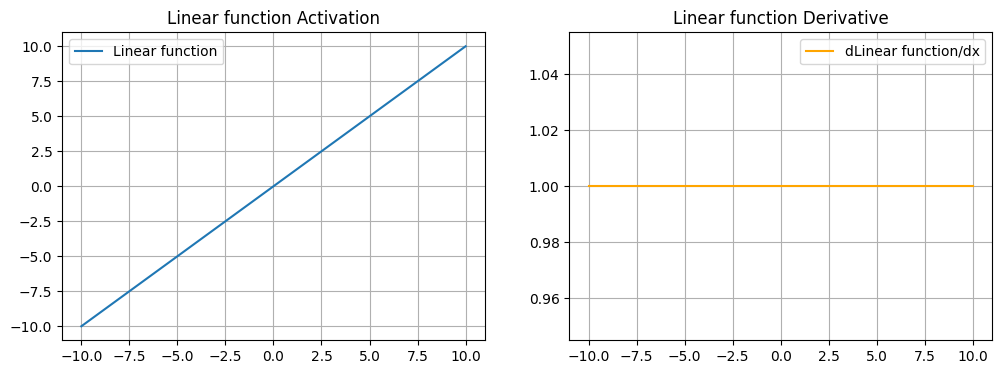

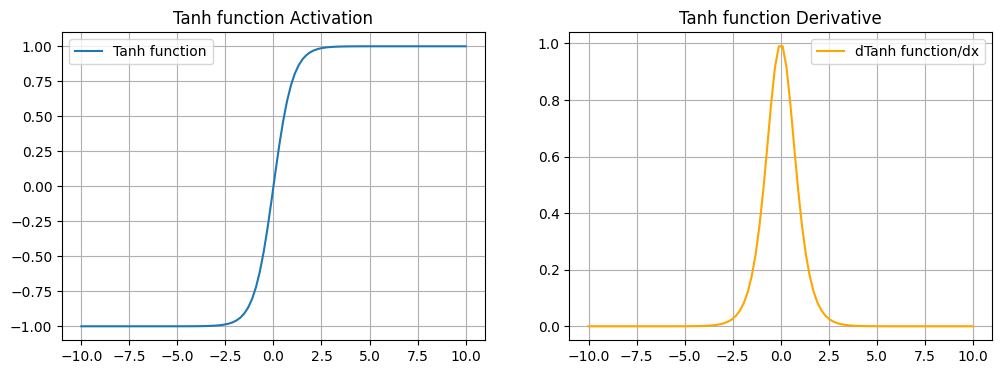

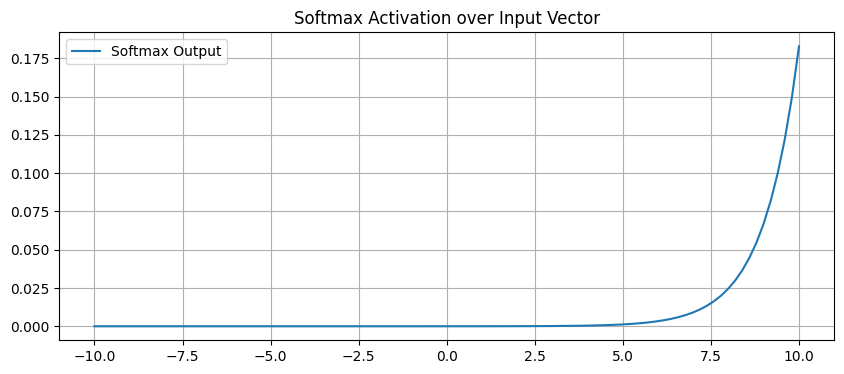

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

x = np.linspace(-10, 10, 100)


def step(x):
    return np.where(x >= 0, 1, 0)

def step_derivative(x):
    return np.zeros_like(x)  # derivative undefined at 0, assume 0

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def prelu(x, alpha=0.25):
    return np.where(x > 0, x, alpha * x)

def prelu_derivative(x, alpha=0.25):
    return np.where(x > 0, 1, alpha)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def elu_derivative(x, alpha=1.0):
    return np.where(x > 0, 1, elu(x, alpha) + alpha)

def swish(x):
    return x * sigmoid(x)

def swish_derivative(x):
    s = sigmoid(x)
    return s + x * s * (1 - s)

def linear(x):
    return x

def linear_derivative(x):
    return np.ones_like(x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

def softmax_derivative(x):
    s = softmax(x)
    return np.diag(s) - np.outer(s, s)

def tanh_fn(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2


def plot_activation_and_derivative(func, dfunc, name, is_vector=False):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    y = func(x)
    dy = dfunc(x)

    axs[0].plot(x, y, label=name)
    axs[0].set_title(f"{name} Activation")
    axs[0].grid()
    axs[0].legend()

    axs[1].plot(x, dy, label=f"d{name}/dx", color='orange')
    axs[1].set_title(f"{name} Derivative")
    axs[1].grid()
    axs[1].legend()

    plt.show()


plot_activation_and_derivative(step, step_derivative, "Step function")
plot_activation_and_derivative(sigmoid, sigmoid_derivative, "Sigmoid function")
plot_activation_and_derivative(relu, relu_derivative, "ReLU function")
plot_activation_and_derivative(lambda x: leaky_relu(x, 0.01), lambda x: leaky_relu_derivative(x, 0.01), "Leaky ReLU function")
plot_activation_and_derivative(lambda x: prelu(x, 0.25), lambda x: prelu_derivative(x, 0.25), "PReLU function")
plot_activation_and_derivative(lambda x: elu(x, 1.0), lambda x: elu_derivative(x, 1.0), "ELU function")
plot_activation_and_derivative(swish, swish_derivative, "Swish function")
plot_activation_and_derivative(linear, linear_derivative, "Linear function")
plot_activation_and_derivative(tanh_fn, tanh_derivative, "Tanh function")


softmax_y = softmax(x)
plt.figure(figsize=(10, 4))
plt.plot(x, softmax_y, label='Softmax Output')
plt.title("Softmax Activation over Input Vector")
plt.grid()
plt.legend()
plt.show()



## 1. Step Function

The Step function outputs 1 for positive input and 0 for negative input.

Purpose: Used in early perceptrons for binary classification.

Drawback: Non-differentiable at 0 and provides no gradient information → not used in modern deep learning.

Derivative: 0 almost everywhere → cannot update weights properly.

## 2. Sigmoid Function

The Sigmoid squashes input to range (0, 1), making it interpretable as probability.

Purpose: Popular for binary classification, logistic regression.

Pros: Smooth, differentiable, outputs probability.

Cons: Causes vanishing gradients for very large or small inputs (saturation).

Derivative: σ(x) * (1 - σ(x)), used during backpropagation.

## 3. ReLU (Rectified Linear Unit)

ReLU outputs x for positive inputs and 0 otherwise.

Purpose: Most widely used activation in deep networks.

Pros: Computationally cheap, reduces vanishing gradient problem.

Cons: Can suffer from dying ReLU problem (neurons stuck at 0 forever).

Derivative: 1 for positive inputs, 0 otherwise → very simple for backpropagation.

## 4. Leaky ReLU

Leaky ReLU modifies ReLU by allowing a small slope αx for negative inputs.

Purpose: Solves dying ReLU by letting small gradient flow even for x < 0.

Derivative: 1 for positive inputs, α for negative inputs.

## 5. PReLU (Parametric ReLU)

PReLU generalizes Leaky ReLU by making α learnable during training.

Purpose: Model can adapt negative slope to improve performance.

Benefit: More flexible and can achieve better accuracy on some tasks.

## 6. ELU (Exponential Linear Unit)

ELU uses an exponential curve for negative values, instead of constant slope.

Purpose: Brings negative outputs closer to 0, reducing bias shift and improving learning.

Pros: Smooth gradient for negative inputs → better convergence.

Cons: Slightly slower due to exponential calculation.

## 7. Swish

Swish is defined as x * sigmoid(x).

Purpose: A newer activation function that is smooth and non-monotonic.

Advantage: Often outperforms ReLU in deep networks because it allows small negative values.

Derivative: Combines sigmoid + product rule, slightly more complex but smooth.

## 8. Linear Activation

Linear activation is simply f(x) = x.

Purpose: Used in regression tasks (output layer).

Derivative: Constant 1 → simple backpropagation.

Limitation: Cannot model non-linear relationships by itself.

## 9. Tanh

Tanh squashes input to (-1, 1) range.

Purpose: Similar to sigmoid but zero-centered → better for training.

Pros: Better convergence than sigmoid for many tasks.

Cons: Still suffers from vanishing gradients for large |x|.

## 10. Softmax

Softmax converts a vector of values into probabilities that sum to 1.

Purpose: Used in the final layer for multi-class classification.

Derivative: Produces a Jacobian matrix used in backprop for cross-entropy loss.

Note: Applied across all classes, not element-wise like others.